In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from surprise import KNNBasic as KNNB, SVD as Singularvaluedecomposition, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate as cv, train_test_split
%matplotlib inline

In [2]:
ratings = pd.read_csv('ratings_small.csv')

In [3]:
ratings.head()
ratings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [4]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [5]:
format_reader = Reader()
load_data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], format_reader)

In [6]:
svd = Singularvaluedecomposition(biased = False)
pmf = cv(svd, load_data, measures=['rmse', 'mae'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0072  1.0155  1.0074  1.0078  1.0123  1.0100  0.0033  
MAE (testset)     0.7782  0.7842  0.7795  0.7778  0.7812  0.7802  0.0023  
Fit time          0.33    0.33    0.34    0.33    0.33    0.33    0.00    
Test time         0.07    0.04    0.04    0.07    0.04    0.05    0.01    


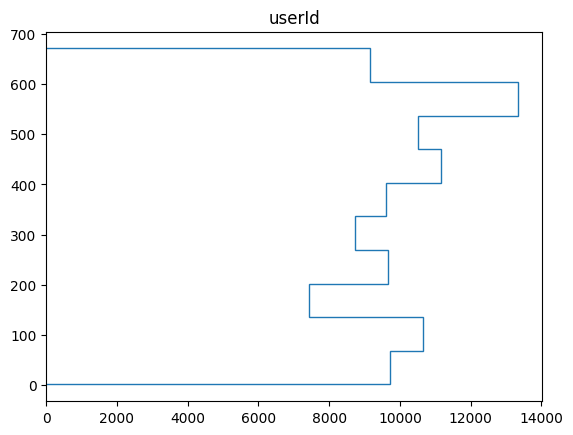

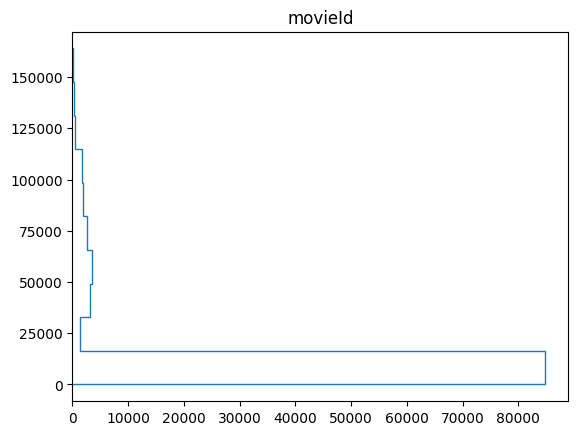

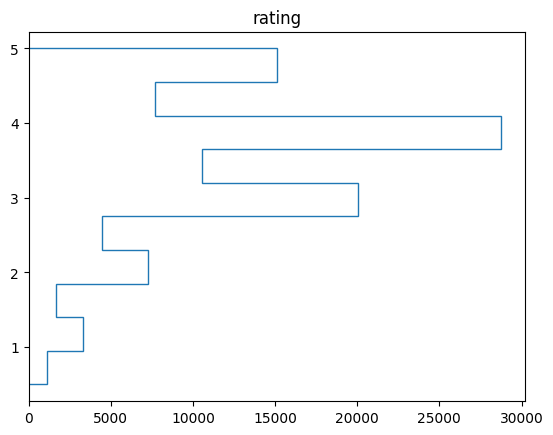

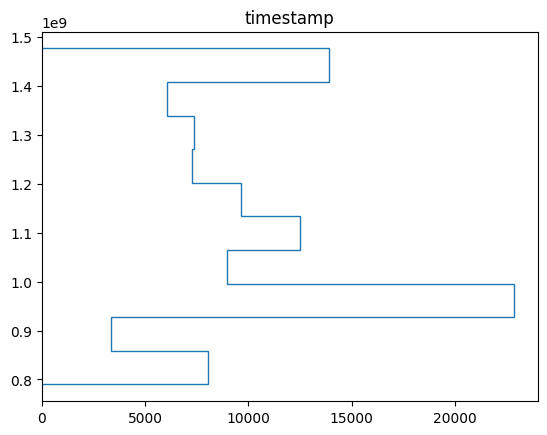

In [7]:
for i in ratings.columns:
    plt.hist(ratings[i],density=False,orientation ='horizontal',histtype = 'step')
    plt.title(i)
    plt.show()

In [8]:
pmf

{'test_rmse': array([1.00715815, 1.0154656 , 1.00744118, 1.007797  , 1.01232382]),
 'test_mae': array([0.77822387, 0.78418194, 0.77954907, 0.77775115, 0.781169  ]),
 'fit_time': (0.3310558795928955,
  0.33470988273620605,
  0.3392331600189209,
  0.3314700126647949,
  0.3347032070159912),
 'test_time': (0.06638693809509277,
  0.03577709197998047,
  0.0356748104095459,
  0.06625795364379883,
  0.035958051681518555)}

In [9]:
print('Collaborative Filtering Average of MAE on PMF : ', pmf['test_mae'].mean())
print('Collaborative Filtering Average of RMSE on PMF : ', pmf['test_rmse'].mean())

Collaborative Filtering Average of MAE on PMF :  0.780175004161441
Collaborative Filtering Average of RMSE on PMF :  1.0100371506083223


In [10]:
options = {'user_based': True}
user = KNNB(sim_options=options)
ub_cross_validate = cv(user, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9657  0.9649  0.9667  0.9643  0.9806  0.9684  0.0061  
MAE (testset)     0.7418  0.7426  0.7420  0.7410  0.7539  0.7443  0.0049  
Fit time          0.03    0.03    0.03    0.03    0.03    0.03    0.00    
Test time         0.42    0.46    0.42    0.46    0.42    0.44    0.02    


In [12]:
print('Collaborative filtering average of MAE on a user-based : ', ub_cross_validate['test_mae'].mean())
print('Collaborative filtering average of RMSE on a user-based : ', ub_cross_validate['test_rmse'].mean())

Collaborative filtering average of MAE on a user-based :  0.7442535095770573
Collaborative filtering average of RMSE on a user-based :  0.9684162458526406


In [14]:
options = {'user_based': False}
item = KNNB(sim_options=options)
ib_cross_validate = cv(item, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9341  0.9424  0.9324  0.9312  0.9358  0.9352  0.0039  
MAE (testset)     0.7224  0.7223  0.7220  0.7196  0.7219  0.7216  0.0010  
Fit time          1.17    1.14    1.05    1.05    1.05    1.09    0.05    
Test time         2.02    1.97    2.04    1.94    1.95    1.98    0.04    


In [15]:
print('Collaborative Filtering Based of MAE average on Items: ', ib_cross_validate['test_mae'].mean())
print('Collaborative Filterings Based of RMSE average on Items: ', ib_cross_validate['test_rmse'].mean())

Collaborative Filtering Based of MAE average on Items:  0.7216484894317502
Collaborative Filterings Based of RMSE average on Items:  0.9351786526207106


In [16]:
options = {'name':'cosine', 'user_based': True}
ub_cosine = KNNB(sim_options=options);
cosine_ub_cv = cv(ub_cosine, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9938  0.9972  0.9908  0.9995  0.9860  0.9935  0.0048  
MAE (testset)     0.7670  0.7702  0.7646  0.7712  0.7624  0.7671  0.0033  
Fit time          0.04    0.05    0.05    0.04    0.04    0.04    0.00    
Test time         0.42    0.44    0.50    0.41    0.48    0.45    0.03    


In [19]:
options = {'name':'msd', 'user_based': True}
userbased_msd = KNNB(sim_options=options);
msd_ub_cv = cv(userbased_msd, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9680  0.9782  0.9596  0.9708  0.9688  0.9691  0.0060  
MAE (testset)     0.7454  0.7534  0.7353  0.7466  0.7438  0.7449  0.0058  
Fit time          0.03    0.03    0.03    0.03    0.03    0.03    0.00    
Test time         0.42    0.42    0.43    0.42    0.49    0.44    0.03    


In [21]:
options = {'name':'pearson', 'user_based': True}
userbased_pear = KNNB(sim_options=options);
ub_pear = cv(userbased_pear, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0003  0.9957  1.0014  0.9966  0.9948  0.9978  0.0026  
MAE (testset)     0.7746  0.7737  0.7755  0.7713  0.7713  0.7733  0.0017  
Fit time          0.05    0.06    0.06    0.06    0.05    0.06    0.00    
Test time         0.41    0.50    0.42    0.42    0.42    0.43    0.03    


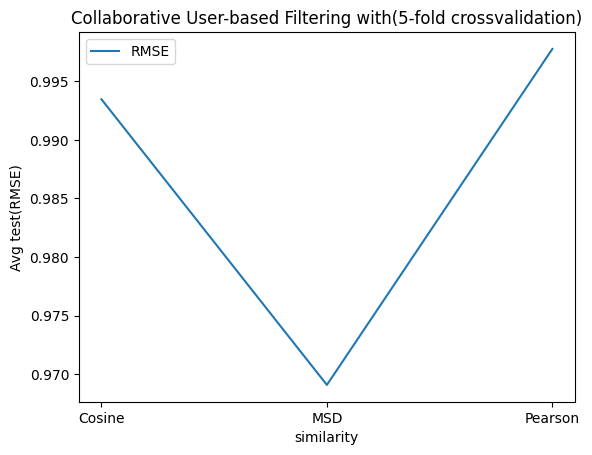

In [25]:
X_axis = [0,1,2]
Y_axis_rmse = [cosine_ub_cv['test_rmse'].mean(),msd_ub_cv['test_rmse'].mean(),ub_pear['test_rmse'].mean()]
plt.plot(X_axis, Y_axis_rmse)
plt.title('Collaborative User-based Filtering with(5-fold crossvalidation)')
plt.legend(['RMSE'])
plt.xticks(X_axis,['Cosine','MSD','Pearson'])
plt.xlabel('similarity')
plt.ylabel('Avg test(RMSE)')
plt.show()

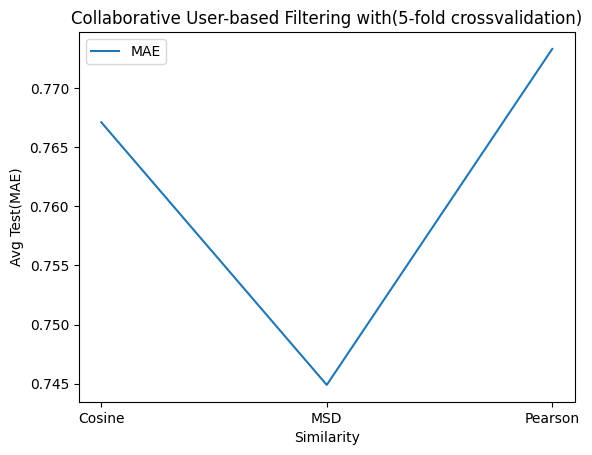

In [26]:
X_axis = [0,1,2]
Y_axis_rmse = [cosine_ub_cv['test_mae'].mean(),msd_ub_cv['test_mae'].mean(),ub_pear['test_mae'].mean()]
plt.plot(X_axis, Y_axis_rmse)
plt.title('Collaborative User-based Filtering with(5-fold crossvalidation)')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Avg Test(MAE)')
plt.show()

In [27]:
options = {'name':'cosine', 'user_based': False}
item_based_cosine = KNNB(sim_options=options);
cosine_ib_cv = cv(item_based_cosine, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0041  0.9966  0.9947  0.9875  0.9949  0.9956  0.0053  
MAE (testset)     0.7828  0.7742  0.7755  0.7690  0.7733  0.7749  0.0045  
Fit time          2.37    2.02    1.96    2.04    1.95    2.07    0.15    
Test time         1.90    1.91    1.91    2.01    1.90    1.92    0.04    


In [28]:
options = {'name':'msd', 'user_based': False}
itembased_msd = KNNB(sim_options=options);
msd_ib_cv = cv(itembased_msd, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9371  0.9375  0.9307  0.9311  0.9409  0.9355  0.0039  
MAE (testset)     0.7255  0.7229  0.7166  0.7184  0.7250  0.7217  0.0036  
Fit time          1.12    1.05    1.09    1.04    1.03    1.07    0.04    
Test time         1.96    2.07    1.97    2.01    2.07    2.02    0.05    


In [29]:
options = {'name':'pearson', 'user_based': False}
itembased_pear = KNNB(sim_options=options);
ib_pear = cv(itembased_pear, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9798  0.9961  0.9924  0.9912  0.9940  0.9907  0.0057  
MAE (testset)     0.7618  0.7721  0.7687  0.7685  0.7715  0.7685  0.0037  
Fit time          4.23    3.88    4.24    3.83    3.64    3.96    0.24    
Test time         1.91    2.06    1.96    1.90    2.05    1.98    0.07    


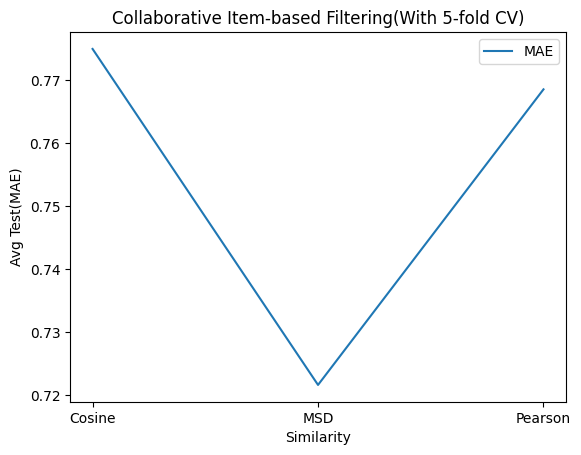

In [30]:
X_axis = [0,1,2]
Y_axis_rmse = [cosine_ib_cv['test_mae'].mean(),msd_ib_cv['test_mae'].mean(),ib_pear['test_mae'].mean()]
plt.plot(X_axis, Y_axis_rmse)
plt.title('Collaborative Item-based Filtering(With 5-fold CV)')
plt.legend(['MAE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Avg Test(MAE)')
plt.show()

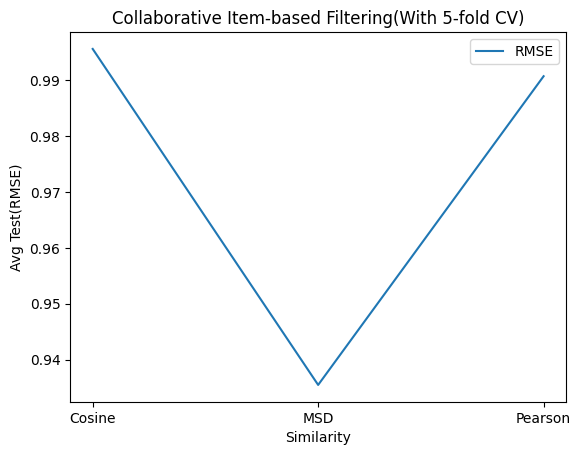

In [31]:
X_axis = [0,1,2]
Y_axis_rmse = [cosine_ib_cv['test_rmse'].mean(),msd_ib_cv['test_rmse'].mean(),ib_pear['test_rmse'].mean()]
plt.plot(X_axis, Y_axis_rmse)
plt.title('Collaborative Item-based Filtering(With 5-fold CV)')
plt.legend(['RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.xlabel('Similarity')
plt.ylabel('Avg Test(RMSE)')
plt.show()

In [ ]:
options = {'name':'cosine', 'user_based': False}
itembased_cosine = KNNB(sim_options=options);
cv_ib_cosine = cv(itembased_cosine, load_data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

In [ ]:
options = {'name':'msd', 'user_based': False}
ib_msd = KNNBasic(sim_options=options);
cv_ib_msd = cross_validate(ib_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

In [36]:
train_set, test_set = train_test_split(load_data, test_size = 0.25, random_state = 42)


In [49]:
userbased_nn_mae = []
userbased_nn_rmse = []
point = list(np.arange(1,65,1))
for i in point:
  UBC = KNNB(k = i, sim_options = {'user_based' : True})
  UBC.fit(train_set)
  predictions = UBC.test(test_set)
  userbased_nn_mae.append(accuracy.mae(predictions))
  userbased_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9063
RMSE: 1.2110
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8196
RMSE: 1.0739
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7878
RMSE: 1.0270
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 1.0039
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7612
RMSE: 0.9913
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7537
RMSE: 0.9822
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7494
RMSE: 0.9772
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7467
RMSE: 0.9740
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7451
RMSE: 0.9721
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7435
RMSE: 0.9698
Computing 

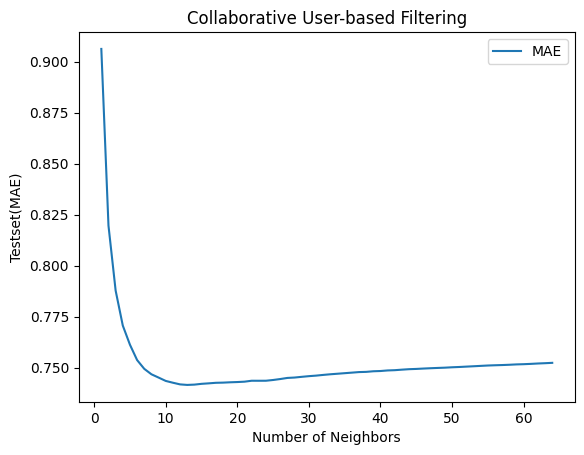

In [50]:
plt.plot(point,userbased_nn_mae)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE)')
plt.legend(['MAE'])
plt.title('Collaborative User-based Filtering')
plt.show()

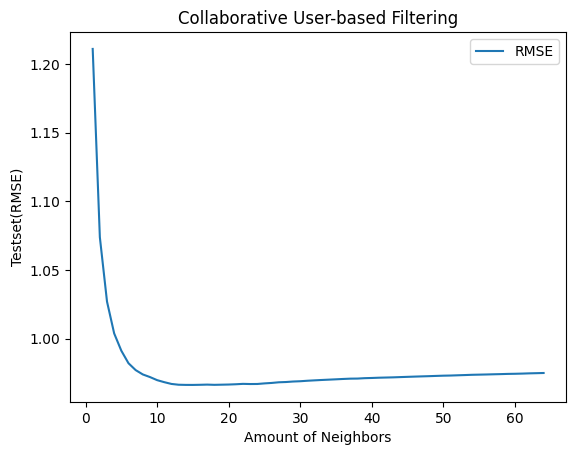

In [51]:
plt.plot(point,userbased_nn_rmse)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Testset(RMSE)')
plt.legend(['RMSE'])
plt.title('Collaborative User-based Filtering')
plt.show()

In [52]:
k_ubc_best = userbased_nn_rmse.index(min(userbased_nn_rmse))+1
print('Best Value of K : ', k_ubc_best)
print('Minimum RMSE : ', min(userbased_nn_rmse))

Best Value of K :  15
Minimum RMSE :  0.9663589276453397


In [53]:
itembased_mae = []
itembased_rmse = []
for i in point:
  itembased = KNNB(k = i, sim_options = {'user_based' : False})
  itembased.fit(train_set)
  predictions = itembased.test(test_set)
  itembased_mae.append(accuracy.mae(predictions))
  itembased_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9703
RMSE: 1.3138
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8749
RMSE: 1.1479
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8337
RMSE: 1.0839
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8142
RMSE: 1.0514
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7966
RMSE: 1.0277
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7855
RMSE: 1.0127
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7765
RMSE: 1.0013
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7706
RMSE: 0.9935
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7659
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7614
RMSE: 0.9816
Computing 

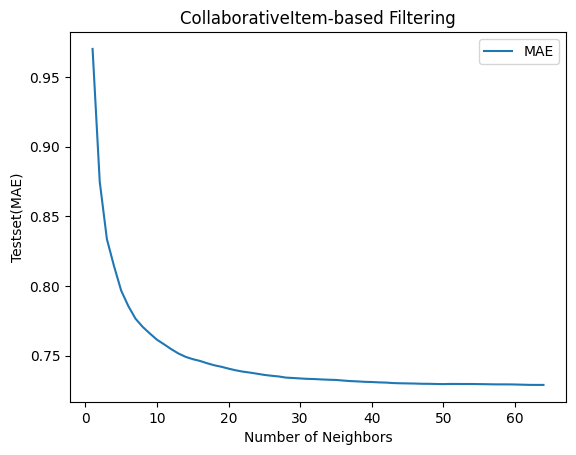

In [54]:
plt.plot(point,itembased_mae)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset(MAE)')
plt.legend(['MAE'])
plt.title('CollaborativeItem-based Filtering')
plt.show()

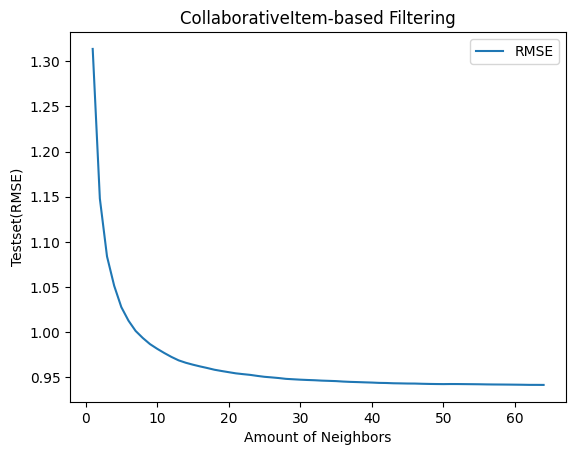

In [55]:
plt.plot(point,itembased_rmse)
plt.xlabel('Amount of Neighbors')
plt.ylabel('Testset(RMSE)')
plt.legend(['RMSE'])
plt.title('CollaborativeItem-based Filtering')
plt.show()

In [56]:
k_ibc_best = itembased_rmse.index(min(itembased_rmse))+1
print('Best Value of K : ', k_ibc_best)
print('Minimum RMSE : ', min(itembased_rmse))

Best Value of K :  64
Minimum RMSE :  0.9414743255163136
